In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, neighbors
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib import style
import warnings, random
from collections import Counter
style.use('fivethirtyeight')

In [2]:
path = "Dados_Modelos\\classificar\\"

In [3]:
colunas = ['id','clump_thickness','unif_cell_size','unif_cell_shape','marg_adhesion','single_epith_cell_size','bare_nuclei','bland_chrom','norm_nucleoli','mitoses','class']

In [4]:
dados = pd.read_csv(path+'breast-cancer-wisconsin.data', header=None)

In [5]:
dados

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [6]:
print(len(dados.columns),len(colunas))

11 11


In [7]:
dados.columns = colunas
dados

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [8]:
dados.replace('?', -99999, inplace=True)
dados.drop(['id'],1,inplace=True)
dados

C:\Users\Gabriel\AppData\Local\Temp/ipykernel_12040/4026422296.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dados.drop(['id'],1,inplace=True)


,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [9]:
x = np.array(dados.drop(['class'],1))
y = np.array(dados['class'])

C:\Users\Gabriel\AppData\Local\Temp/ipykernel_12040/3248474208.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(dados.drop(['class'],1))


In [10]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2 ,random_state=101)

In [11]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)

KNeighborsClassifier()

In [12]:
acuracia = clf.score(X_test,y_test)
acuracia

0.9785714285714285

In [13]:
example_measures = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

[2 2]


## Euclidean Distance

In [14]:
plot1 = [1,3]
plot2 = [2,5]
euclidean_distance = sqrt( (plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2 )
euclidean_distance

2.23606797749979

In [15]:
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

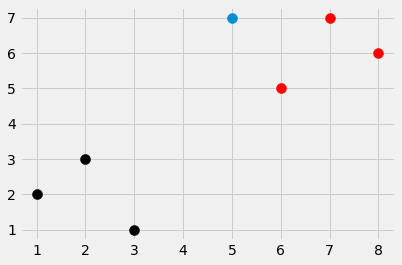

In [16]:
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100)

plt.show()

In [17]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])
    
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

In [18]:
result = k_nearest_neighbors(dataset, new_features)
result

'r'

### Testando em dados reais

In [19]:
full_data = dados.astype(float).values.tolist()

In [23]:
random.shuffle(full_data)
test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [24]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [27]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        total += 1
print('Acurácia do Kneighbors Manual:', correct/total)
print('Acurácia do Kneighbors Sklearn:', clf.score(X_test,y_test))

Acurácia do Kneighbors Manual: 0.9496402877697842
Acurácia do Kneighbors Sklearn: 0.9785714285714285
